# Sentiment Analysis and Forecasting of Tweets

In [5]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime
import re
from textblob import TextBlob
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from datetime import datetime,date
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import statsmodels.tsa as tsa
from statsmodels.tsa.statespace.sarimax import SARIMAX

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preparation

In [6]:
twitter_df_1 = pd.read_csv("tweet_df_v1_1.csv")
twitter_df_2 = pd.read_csv("tweet_df_v1_2.csv")

In [7]:
twitter_df_1.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [8]:
twitter_df_1.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [9]:
twitter_df_2.head()

,row,id,date,query,handle,tweet
0,816210,1551363506,Sat Apr 18 08:51:40 PDT 2009,NO_QUERY,prosario_2000,I hope you are having a great day
1,816211,1551363569,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,Chelsea_Volturi,Nope Just Bored Well Say That Most Of The Time...
2,816212,1551363682,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,askbillmitchell,Sometimes and just a little cryptic LOL I am j...
3,816213,1551363752,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,kendiixd,so i guesss im not in coolifornia anymore how ...
4,816214,1551363844,Sat Apr 18 08:51:42 PDT 2009,NO_QUERY,ladycalypso,I do that too but right now its the Radiant Da...


In [10]:
twitter_df_2.tail()

,row,id,date,query,handle,tweet
783785,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school is the best feel...
783786,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool to hear old Walt interview...
783787,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover Ask me fo...
783788,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time Tup...
783789,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday


In [11]:
twitter_df = pd.concat([twitter_df_1, twitter_df_1])

In [12]:
twitter_df.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [13]:
twitter_df.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [14]:
print(twitter_df.shape)

(1632420, 6)


In [15]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632420 entries, 0 to 816209
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   row     1632420 non-null  int64 
 1   id      1632420 non-null  int64 
 2   date    1632420 non-null  object
 3   query   1632420 non-null  object
 4   handle  1632420 non-null  object
 5   tweet   1629024 non-null  object
dtypes: int64(2), object(4)
memory usage: 87.2+ MB


In [16]:
twitter_df = twitter_df.reset_index()
twitter_df.head()

,index,row,id,date,query,handle,tweet
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [17]:
twitter_df = twitter_df[['date','tweet']]
twitter_df.head()

,date,tweet
0,Mon Apr 06 22:19:45 PDT 2009,Awww thats a bummer You shoulda got David Carr...
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he cant update his Facebook by t...
2,Mon Apr 06 22:19:53 PDT 2009,I dived many times for the ball Managed to sav...
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,no its not behaving at all im mad why am i her...


In [18]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [19]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1629024 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [20]:
# functions to apply to tweets
def polarity_score(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return - 1

def polarity_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"
    
def subjectivity_word(x):
    if (x < 0.6 and x >0.4):
        return "subjective"
    else:
        return "objective"
    
def vader_score(x):
    if x > 0.05:
        return 1
    elif x < -0.05:
        return -1
    else:
        return 0

def vader_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"

In [21]:
twitter_df.tweet[0]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [22]:
twitter_df.loc[0][1]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [23]:
#pip install textblob

In [24]:
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [25]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1629024 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [26]:
twitter_df["tweet"] = twitter_df["tweet"].astype(str)

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
twitter_df['lemmatizer'] = twitter_df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [29]:
d = datetime.now()

In [30]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])

In [31]:
twitter_df['date'] = [d.date() for d in twitter_df["date"]]
twitter_df

,date,tweet,lemmatizer
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...
2,2009-04-06,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...
3,2009-04-06,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,2009-04-06,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...
...,...,...,...
1632415,2009-04-18,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH
1632416,2009-04-18,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...
1632417,2009-04-18,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...
1632418,2009-04-18,hello again,hello again


In [32]:
twitter_df = twitter_df.sort_values(by='date')

In [33]:
twitter_df

,date,tweet,lemmatizer
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...
...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me


In [34]:
date_counts = twitter_df['date'].value_counts()
date_counts_sorted = date_counts.sort_index()
date_counts_sorted

date
2009-04-06     6720
2009-04-07    34622
2009-04-17     6168
2009-04-18    22628
2009-04-19    22854
2009-04-20    15634
2009-04-21     7008
2009-05-01     6508
2009-05-02    22796
2009-05-03    29558
2009-05-04    12876
2009-05-09     9994
2009-05-10    21404
2009-05-11     3530
2009-05-13     3552
2009-05-14    14616
2009-05-16     7676
2009-05-17    28578
2009-05-18    26716
2009-05-21     1576
2009-05-22    27894
2009-05-23      148
2009-05-25      142
2009-05-26     8714
2009-05-27      734
2009-05-28    12372
2009-05-29    58902
2009-05-30    78558
2009-05-31    72800
2009-06-01    88594
2009-06-02    50846
2009-06-03    32038
2009-06-04     6304
2009-06-05    47136
2009-06-06    87488
2009-06-07    76336
2009-06-14     6692
2009-06-15    90716
2009-06-16    87232
2009-06-17    88024
2009-06-18    86008
2009-06-19    86272
2009-06-20    90728
2009-06-21    32720
2009-06-22    24018
2009-06-23    34004
2009-06-24    12598
2009-06-25    39388
Name: count, dtype: int64

In [35]:
date_counts_sorted.values

array([ 6720, 34622,  6168, 22628, 22854, 15634,  7008,  6508, 22796,
       29558, 12876,  9994, 21404,  3530,  3552, 14616,  7676, 28578,
       26716,  1576, 27894,   148,   142,  8714,   734, 12372, 58902,
       78558, 72800, 88594, 50846, 32038,  6304, 47136, 87488, 76336,
        6692, 90716, 87232, 88024, 86008, 86272, 90728, 32720, 24018,
       34004, 12598, 39388], dtype=int64)

### Plot of the Number of Tweets over Time

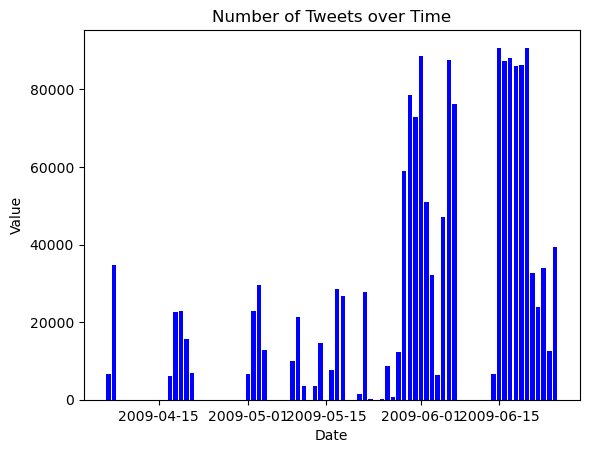

In [36]:
plt.bar(date_counts_sorted.index, date_counts_sorted.values, color = "blue")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Number of Tweets over Time")
plt.show()

In [37]:
twitter_df["character_count"] = twitter_df["tweet"].apply(len)

### Distribution Plot of Character Counts

Text(0.5, 1.0, 'Character Count Distribution')

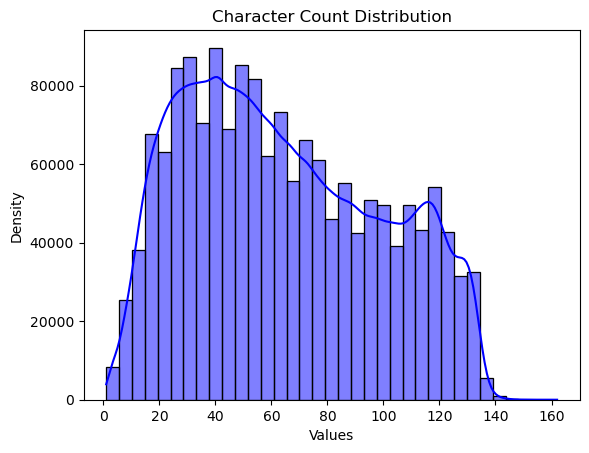

In [38]:
sns.histplot(twitter_df["character_count"], kde=True, bins=35, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Character Count Distribution')

### Sentiment Analysis

In [39]:
def calculate_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [40]:
twitter_df["polarity_scores"] = twitter_df["lemmatizer"].apply(calculate_polarity)

In [41]:
twitter_df

,date,tweet,lemmatizer,character_count,polarity_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,0.200
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,0.000
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,0.000
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,0.475
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,0.850
...,...,...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time,32,0.250
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2,27,0.000
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...,84,-0.200
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me,28,0.000


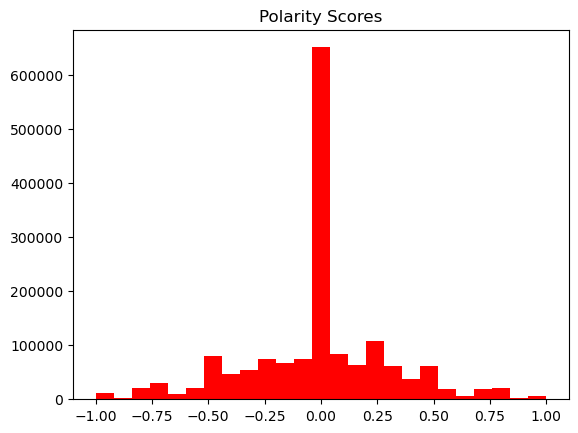

In [42]:
plt.hist(twitter_df['polarity_scores'], bins = 25, color = "red")
plt.title('Polarity Scores')
plt.show()

In [43]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)

In [44]:
twitter_df.head()

,date,tweet,lemmatizer,character_count,polarity_scores,polarity_scores_int,polarity_word
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,0.200,1,positive
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,0.000,0,neutral
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,0.000,0,neutral
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,0.475,1,positive
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,0.850,1,positive


<Axes: xlabel='polarity_word', ylabel='count'>

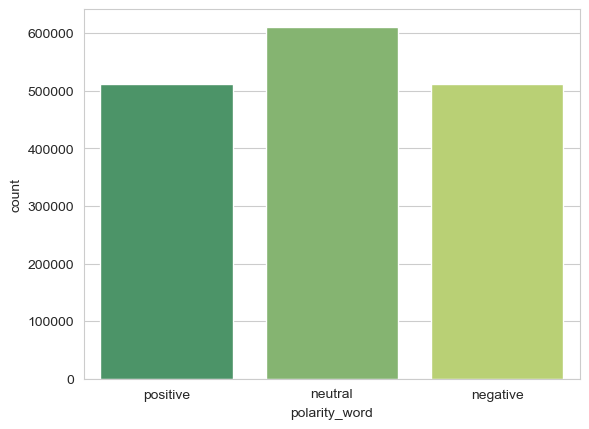

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='polarity_word',data=twitter_df, palette='summer')

In [46]:
def calculate_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

In [48]:
twitter_df["subjectivity_scores"] = twitter_df["lemmatizer"].apply(calculate_subjectivity)

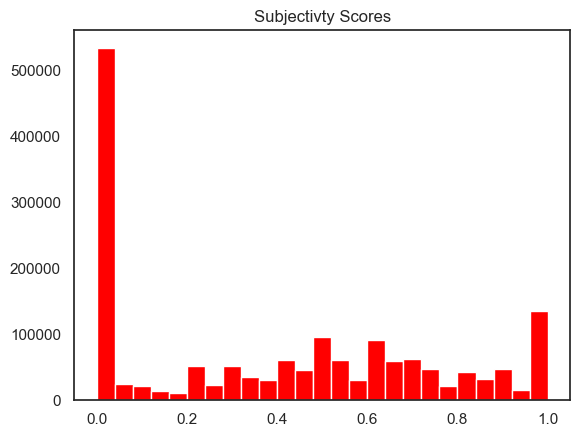

In [49]:
sns.set(style='white')
plt.hist(twitter_df['subjectivity_scores'], bins = 25, color = "red")
plt.title('Subjectivty Scores')
plt.show()

In [51]:
analyzer = SentimentIntensityAnalyzer()
vader_scores = twitter_df['lemmatizer'].apply(analyzer.polarity_scores)
vader = []
for i in vader_scores:
    vader.append(i['compound'])
twitter_df['vader_scores'] = vader

In [52]:
twitter_df

,date,tweet,lemmatizer,character_count,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,70,0.200,1,positive,0.45,-0.3818
1616382,2009-04-06,correction i GOT a badass fringe,correction i GOT a badass fringe,32,0.000,0,neutral,0.00,0.3400
1616381,2009-04-06,but you did go to hash bash anyway,but you did go to hash bash anyway,34,0.000,0,neutral,0.00,0.0000
1616380,2009-04-06,Feels pretty good doesnt it,Feels pretty good doesnt it,27,0.475,1,positive,0.80,0.7269
1616379,2009-04-06,Callin it a night I always have the best sleep...,Callin it a night I always have the best sleep...,67,0.850,1,positive,0.45,0.7964
...,...,...,...,...,...,...,...,...,...
1606161,2009-06-25,getting ready for work fun times,getting ready for work fun time,32,0.250,1,positive,0.35,0.7003
1606162,2009-06-25,hey garskin gue mngk nympe2,hey garskin gue mngk nympe2,27,0.000,0,neutral,0.00,0.0000
1606163,2009-06-25,school in a bitim sooo tired and wanna go back...,school in a bitim sooo tired and wanna go back...,84,-0.200,-1,negative,0.35,-0.2382
1606156,2009-06-25,Today is cleaning day for me,Today is cleaning day for me,28,0.000,0,neutral,0.00,0.0000


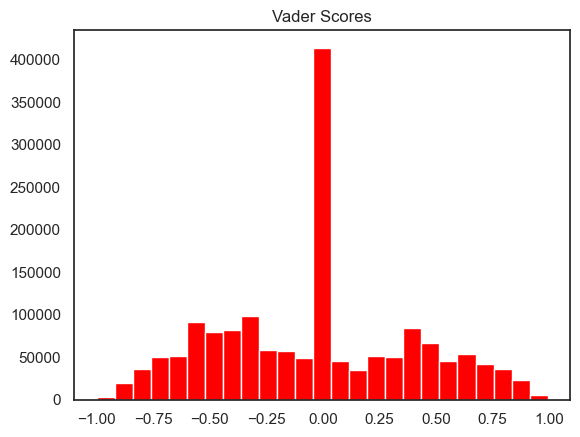

In [53]:
plt.hist(twitter_df['vader_scores'], bins = 25, color = "red")
plt.title('Vader Scores')
plt.show()

In [54]:
# aggregating the scores for each date in the dataset by computing the average
polarity_df = twitter_df.groupby('date')['polarity_scores'].mean().reset_index()
subjectivity_df = twitter_df.groupby('date')['subjectivity_scores'].mean().reset_index()
vader_df = twitter_df.groupby('date')['vader_scores'].mean().reset_index()

In [55]:
data = {
    'date': polarity_df['date'],
    'polarity_scores': polarity_df['polarity_scores'],
    'subjectivity_scores': subjectivity_df['subjectivity_scores'],
    'vader_scores': vader_df['vader_scores']
}

ts_df = pd.DataFrame(data)
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.094961,0.409290,0.147343
1,2009-04-07,0.099100,0.401130,0.162493
2,2009-04-17,0.120122,0.410242,0.198122
3,2009-04-18,0.034408,0.396451,0.046762
4,2009-04-19,-0.006202,0.378777,-0.020330
5,2009-04-20,-0.011622,0.385611,-0.036186
6,2009-04-21,-0.003289,0.393079,-0.029846
7,2009-05-01,-0.010592,0.405134,-0.045176
8,2009-05-02,-0.007667,0.393371,-0.028857
9,2009-05-03,-0.010416,0.394671,-0.035131


In [56]:
ts_df['date'] = pd.to_datetime(ts_df['date'], format="%Y-%m-%d %H:%M:%S")

In [57]:
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.094961,0.409290,0.147343
1,2009-04-07,0.099100,0.401130,0.162493
2,2009-04-17,0.120122,0.410242,0.198122
3,2009-04-18,0.034408,0.396451,0.046762
4,2009-04-19,-0.006202,0.378777,-0.020330
5,2009-04-20,-0.011622,0.385611,-0.036186
6,2009-04-21,-0.003289,0.393079,-0.029846
7,2009-05-01,-0.010592,0.405134,-0.045176
8,2009-05-02,-0.007667,0.393371,-0.028857
9,2009-05-03,-0.010416,0.394671,-0.035131


In [58]:
ts_df.set_index('date', inplace=True)

In [59]:
ts_df = ts_df.resample('D').ffill()

In [60]:
ts_df

,polarity_scores,subjectivity_scores,vader_scores
date,,,
2009-04-06,0.094961,0.409290,0.147343
2009-04-07,0.099100,0.401130,0.162493
2009-04-08,0.099100,0.401130,0.162493
2009-04-09,0.099100,0.401130,0.162493
2009-04-10,0.099100,0.401130,0.162493
...,...,...,...
2009-06-21,-0.000478,0.400266,-0.022298
2009-06-22,-0.024853,0.407731,-0.061300
2009-06-23,-0.020091,0.405474,-0.048686


### Plot pof the Average Sentiment Score over time

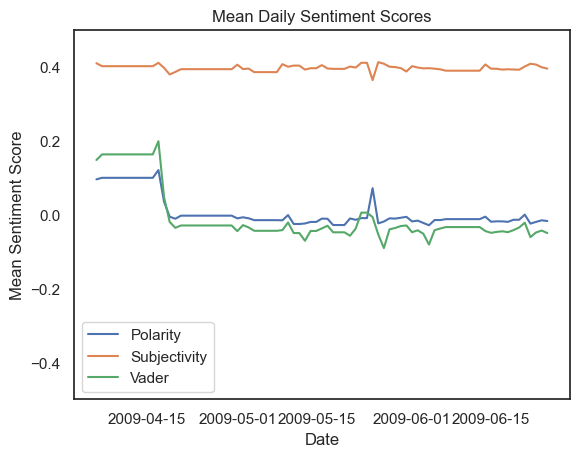

In [61]:
plt.plot(ts_df['polarity_scores'],label='Polarity')
plt.plot(ts_df['subjectivity_scores'],label="Subjectivity")
plt.plot(ts_df['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### Forecasting

In [410]:
ts_df[['polarity_scores']]

,polarity_scores
date,
2009-04-06,0.094961
2009-04-07,0.099100
2009-04-08,0.099100
2009-04-09,0.099100
2009-04-10,0.099100
...,...
2009-06-21,-0.000478
2009-06-22,-0.024853
2009-06-23,-0.020091


In [211]:
data_train = ts_df[0:int(len(ts_df)*.8)]

In [212]:
data_train

,polarity_scores,subjectivity_scores,vader_scores
date,,,
2009-04-06,0.094961,0.409290,0.147343
2009-04-07,0.099100,0.401130,0.162493
2009-04-08,0.099100,0.401130,0.162493
2009-04-09,0.099100,0.401130,0.162493
2009-04-10,0.099100,0.401130,0.162493
...,...,...,...
2009-06-04,-0.029274,0.395735,-0.081419
2009-06-05,-0.015090,0.394365,-0.042475
2009-06-06,-0.015217,0.392641,-0.038026


In [213]:
data_train.index

DatetimeIndex(['2009-04-06', '2009-04-07', '2009-04-08', '2009-04-09',
               '2009-04-10', '2009-04-11', '2009-04-12', '2009-04-13',
               '2009-04-14', '2009-04-15', '2009-04-16', '2009-04-17',
               '2009-04-18', '2009-04-19', '2009-04-20', '2009-04-21',
               '2009-04-22', '2009-04-23', '2009-04-24', '2009-04-25',
               '2009-04-26', '2009-04-27', '2009-04-28', '2009-04-29',
               '2009-04-30', '2009-05-01', '2009-05-02', '2009-05-03',
               '2009-05-04', '2009-05-05', '2009-05-06', '2009-05-07',
               '2009-05-08', '2009-05-09', '2009-05-10', '2009-05-11',
               '2009-05-12', '2009-05-13', '2009-05-14', '2009-05-15',
               '2009-05-16', '2009-05-17', '2009-05-18', '2009-05-19',
               '2009-05-20', '2009-05-21', '2009-05-22', '2009-05-23',
               '2009-05-24', '2009-05-25', '2009-05-26', '2009-05-27',
               '2009-05-28', '2009-05-29', '2009-05-30', '2009-05-31',
      

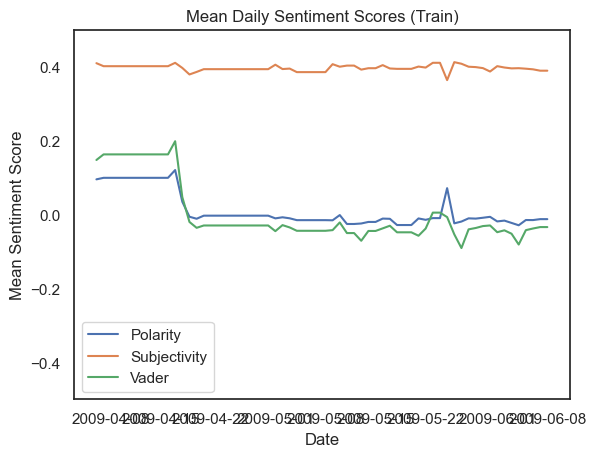

In [214]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

plt.plot(data_train['polarity_scores'],label='Polarity')
plt.plot(data_train['subjectivity_scores'],label="Subjectivity")
plt.plot(data_train['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Train)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

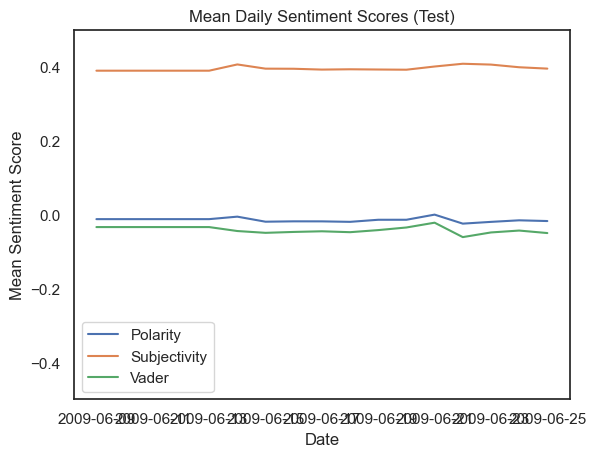

In [215]:
plt.plot(data_test['polarity_scores'],label='Polarity')
plt.plot(data_test['subjectivity_scores'],label="Subjectivity")
plt.plot(data_test['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Test)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### ForecasterAutoreg Polarity

#### Model Build

In [216]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=data_train['polarity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-08 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-10 14:36:03 
Last fit date: 2023-11-10 14:36:03 
Skforecast version: 0.10.1 
Python version:

In [217]:
# Predictions
# ==============================================================================
steps = len(data_test)
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2009-06-09   -0.004272
2009-06-10   -0.011965
2009-06-11   -0.005762
2009-06-12   -0.017874
2009-06-13   -0.019675
Freq: D, Name: pred, dtype: float64

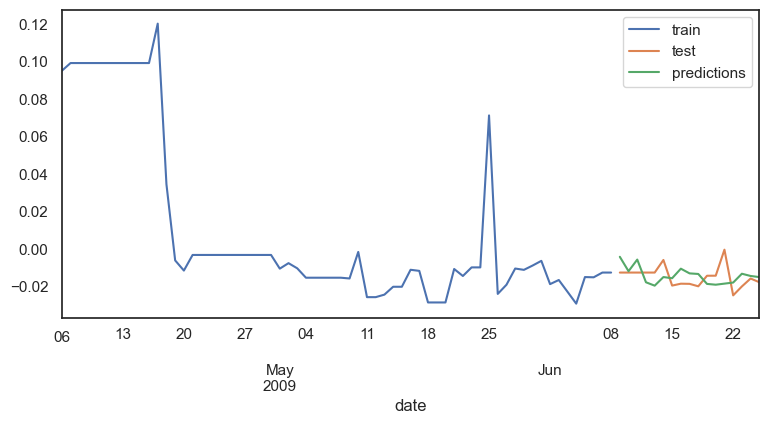

In [218]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [219]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 5.320433840060729e-05


In [220]:
# Hyperparameter Grid search
# ==============================================================================
steps = len(data_test)
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['polarity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.00033179981907190744



In [221]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000332,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000332,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000332,5,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000332,3,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",0.000332,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.000332,5,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000335,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000337,3,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000342,10,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000342,10,100


In [222]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['polarity_scores'])

In [223]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

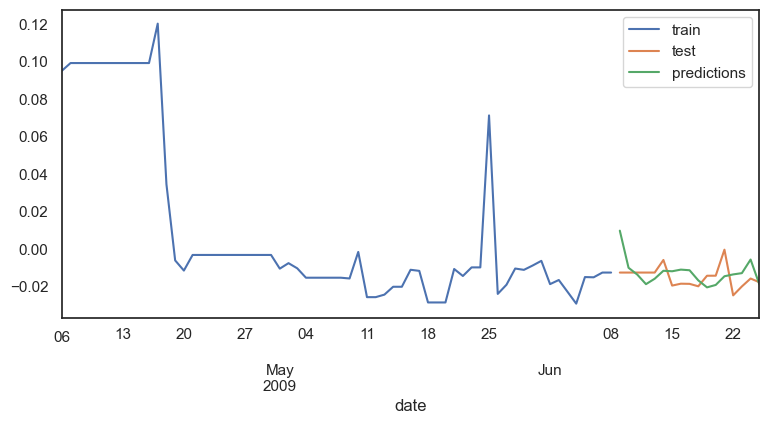

In [224]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [225]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 7.709247000892577e-05


#### 1-Week Forecast

In [226]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [230]:
# Predictions
# ==============================================================================
week_rf_predictions_pol = forecaster.predict(steps=7)

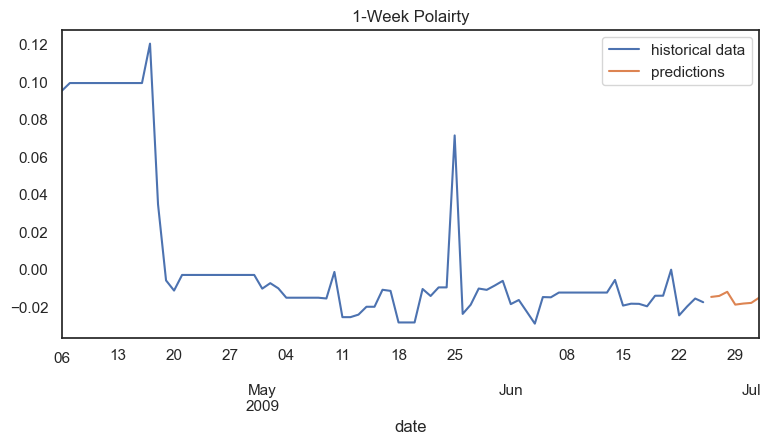

In [231]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
week_rf_predictions_pol.plot(ax=ax, label='predictions')
plt.title('1-Week Polairty')
ax.legend();

#### 1-Month Forecast

In [232]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [233]:
# Predictions
# ==============================================================================
month_rf_predictions_pol = forecaster.predict(steps=30)

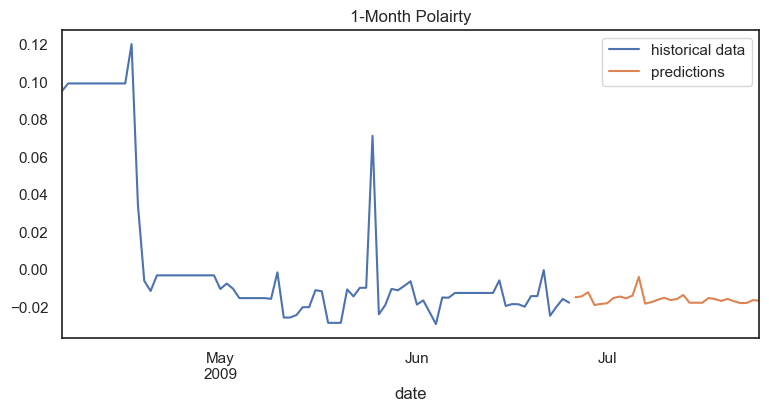

In [234]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
month_rf_predictions_pol.plot(ax=ax, label='predictions')
plt.title('1-Month Polairty')
ax.legend();

#### 3-Month Forecast

In [235]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=ts_df['polarity_scores'])

In [236]:
# Predictions
# ==============================================================================
three_m_rf_predictions_pol = forecaster.predict(steps=90)

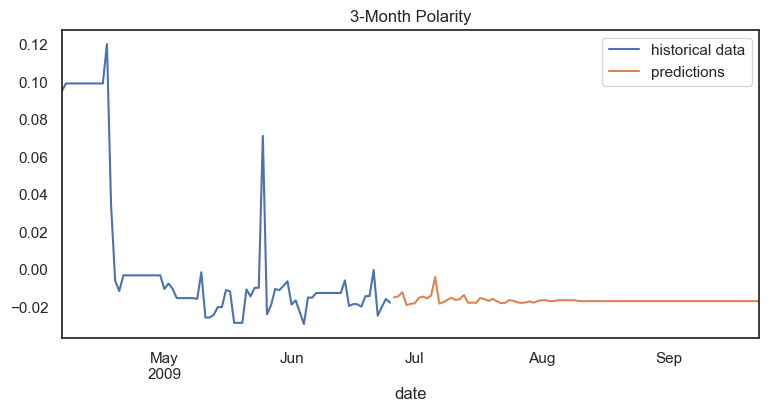

In [237]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['polarity_scores'].plot(ax=ax, label='historical data')
three_m_rf_predictions_pol.plot(ax=ax, label='predictions')
plt.title('3-Month Polarity')
ax.legend();

### ForecasterAutoreg Subjectivity

### Model Build

In [238]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags = 7
                )

forecaster.fit(y=data_train['subjectivity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=12356) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-08 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12356, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-10 14:39:23 
Last fit date: 2023-11-10 14:39:23 
Skforecast version: 0.10.1 
Python vers

In [239]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2009-06-09    0.392293
2009-06-10    0.392809
2009-06-11    0.393892
2009-06-12    0.395991
2009-06-13    0.394071
Freq: D, Name: pred, dtype: float64

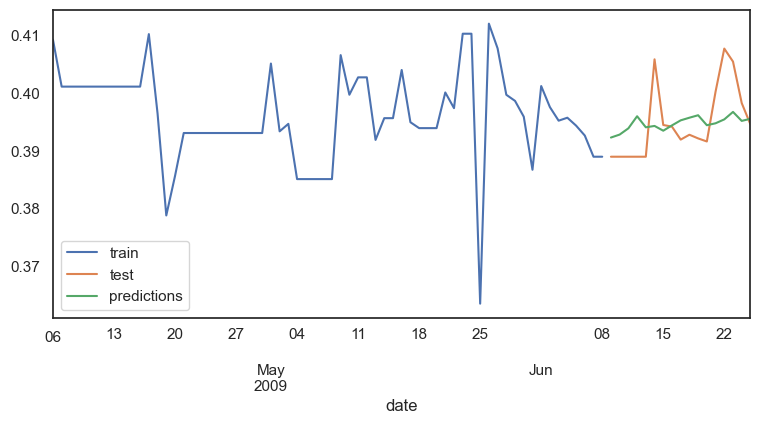

In [240]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [241]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 3.365408406293744e-05


In [242]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['subjectivity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.00010847930578586045



In [243]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000108,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000112,3,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000114,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000120,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000126,10,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000127,5,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000142,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000144,3,500
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000144,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000144,10,100


### Final model

In [244]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=12356)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['subjectivity_scores'])

In [245]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

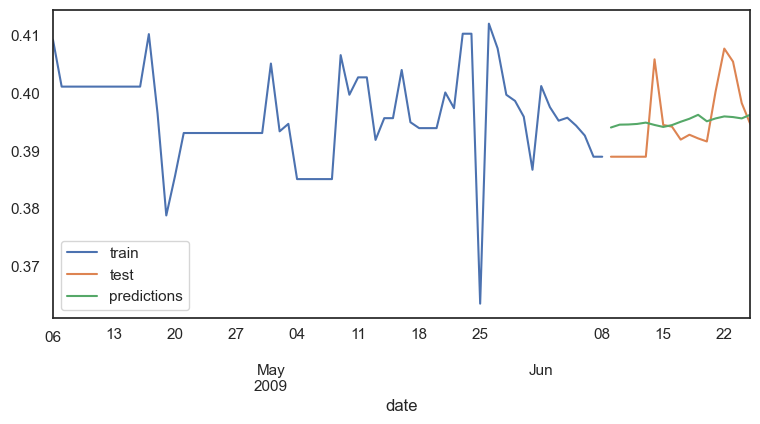

In [246]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [247]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 3.496829701295722e-05


### Forecast

#### 1-Week Forecast

In [248]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [249]:
# Predictions
# ==============================================================================
week_rf_predictions_sub = forecaster.predict(steps=7)

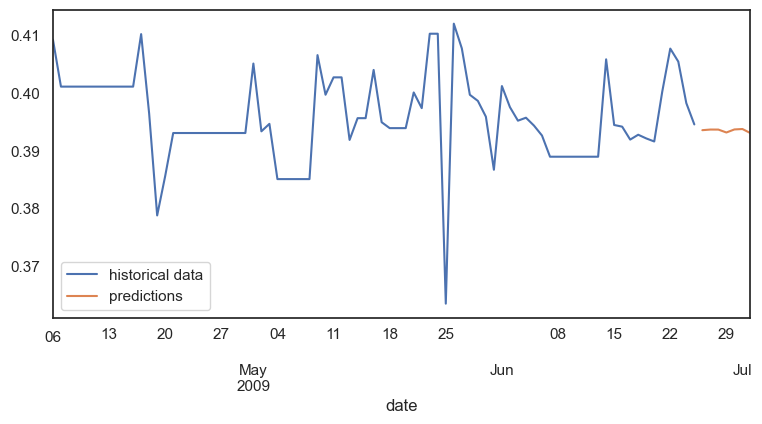

In [250]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
week_rf_predictions_sub.plot(ax=ax, label='predictions')
ax.legend();

#### 1-Month Forecast

In [251]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [252]:
# Predictions
# ==============================================================================
month_rf_predictions_sub = forecaster.predict(steps=30)

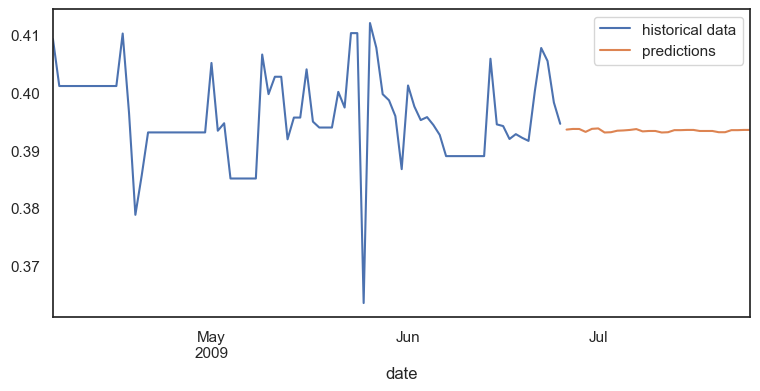

In [253]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
month_rf_predictions_sub.plot(ax=ax, label='predictions')
ax.legend();

#### 3-Month Forecast

In [254]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['subjectivity_scores'])

In [255]:
# Predictions
# ==============================================================================
threem_predictions_sub = forecaster.predict(steps=90)

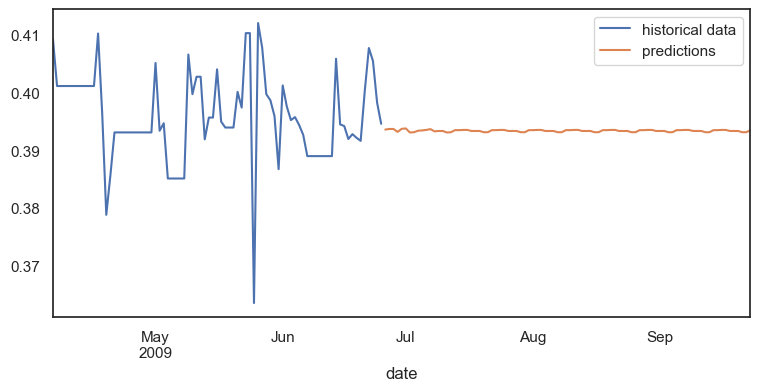

In [256]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['subjectivity_scores'].plot(ax=ax, label='historical data')
threem_predictions_sub.plot(ax=ax, label='predictions')
ax.legend();

### ForecasterAutoreg Vader

### Model Build

In [257]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags = 7
                )

forecaster.fit(y=data_train['vader_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=4567) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-08 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4567, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-10 14:41:10 
Last fit date: 2023-11-10 14:41:10 
Skforecast version: 0.10.1 
Python versio

In [258]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2009-06-09   -0.044162
2009-06-10   -0.046658
2009-06-11   -0.047359
2009-06-12   -0.045447
2009-06-13   -0.039635
Freq: D, Name: pred, dtype: float64

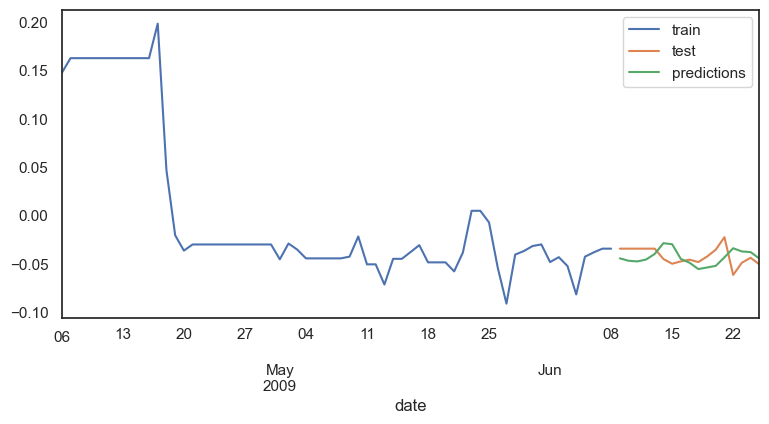

In [259]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [260]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00018430864616540498


In [261]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['vader_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.0003361697181951018



In [267]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000336,3,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000338,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000342,10,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000343,3,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000378,10,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000379,5,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000425,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000445,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000446,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000449,5,100


In [268]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=4567)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['vader_scores'])

In [269]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

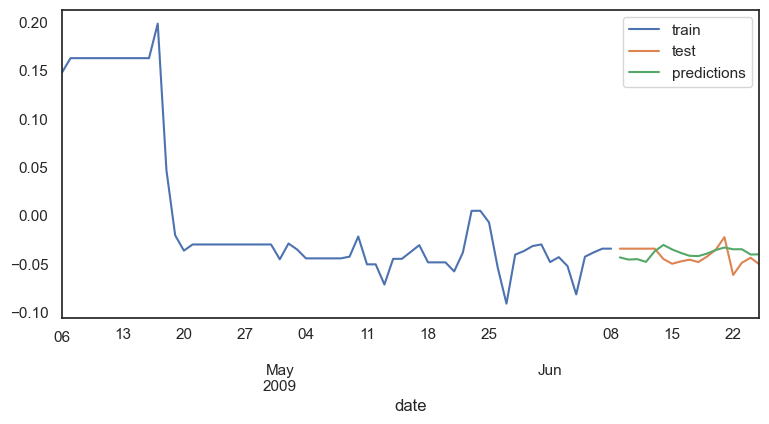

In [270]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [271]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00013039503925619056


### Forecast

#### 1-Week Forecast

In [272]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [273]:
# Predictions
# ==============================================================================
week_rf_predictions_vad = forecaster.predict(steps=7)

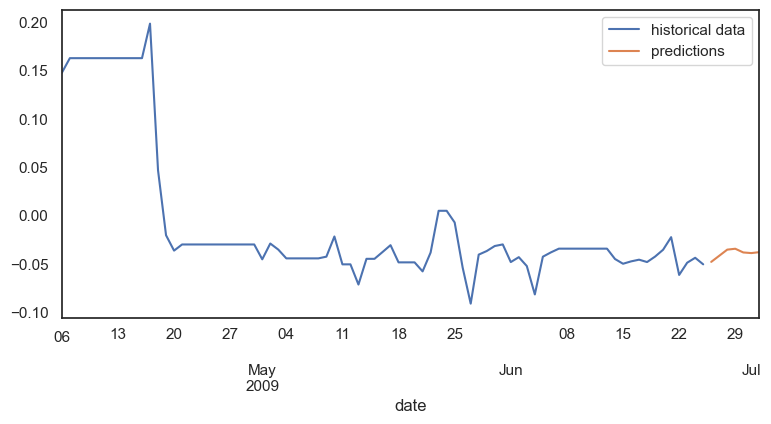

In [274]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
week_rf_predictions_vad.plot(ax=ax, label='predictions')
ax.legend();

#### 1-Month Forecast

In [275]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [276]:
# Predictions
# ==============================================================================
month_predictions_vad = forecaster.predict(steps=30)

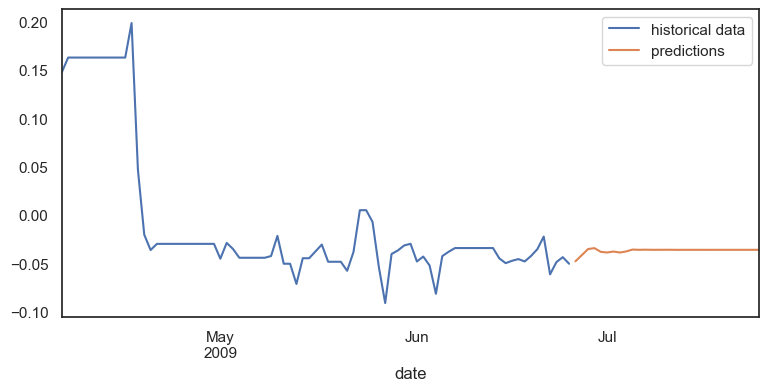

In [277]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
month_predictions_vad.plot(ax=ax, label='predictions')
ax.legend();

#### 3-Month Forecast

In [278]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=ts_df['vader_scores'])

In [279]:
# Predictions
# ==============================================================================
threem_predictions_vad = forecaster.predict(steps=90)

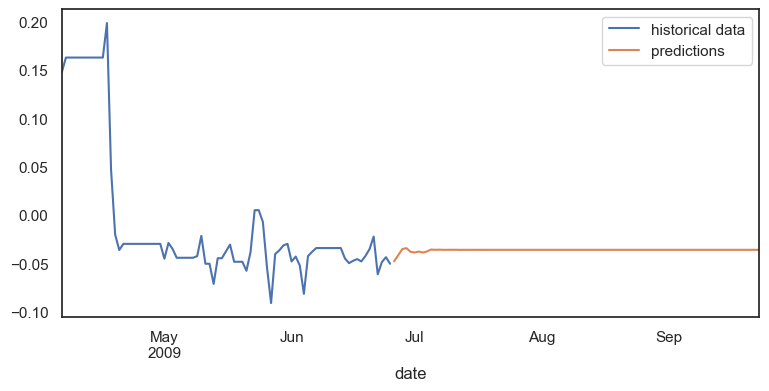

In [280]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
ts_df['vader_scores'].plot(ax=ax, label='historical data')
threem_predictions_vad.plot(ax=ax, label='predictions')
ax.legend();

### ARIMA

In [281]:
ts_df

,polarity_scores,subjectivity_scores,vader_scores
date,,,
2009-04-06,0.094961,0.409290,0.147343
2009-04-07,0.099100,0.401130,0.162493
2009-04-08,0.099100,0.401130,0.162493
2009-04-09,0.099100,0.401130,0.162493
2009-04-10,0.099100,0.401130,0.162493
...,...,...,...
2009-06-21,-0.000478,0.400266,-0.022298
2009-06-22,-0.024853,0.407731,-0.061300
2009-06-23,-0.020091,0.405474,-0.048686


In [282]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

### VADER

In [283]:
y_train = data_train['vader_scores']
y_test = data_test['vader_scores']

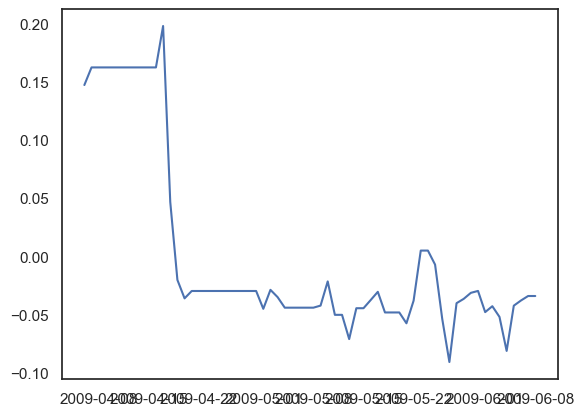

In [284]:
plt.plot(y_train)
plt.show()

In [285]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -2.213909380177784
p-value 0.02578527740987117
Number of lags used 1
Number of observations 62
Critical values {'1%': -2.602744838709677, '5%': -1.9460766397569735, '10%': -1.6131357396529151}
Maximised information criterion -238.31789792561483


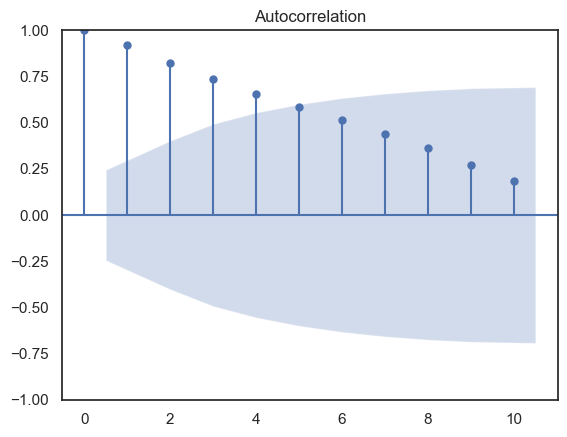

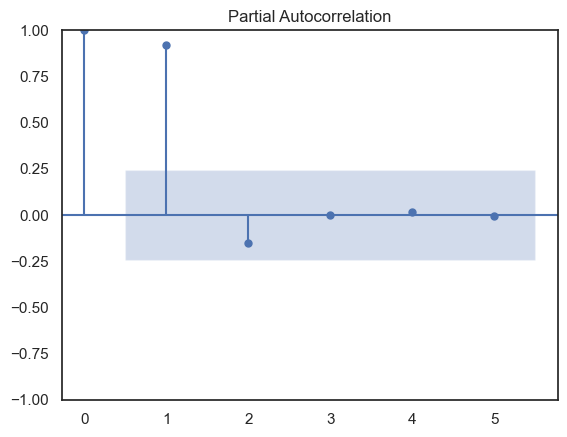

In [286]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [287]:
ARIMA_train = SARIMAX(y_train, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

C:\Users\benmc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [288]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [289]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [290]:
y_pred_df

,lower vader_scores,upper vader_scores,Predictions
date,,,
2009-06-09,-0.083172,0.018590,-0.032291
2009-06-10,-0.105353,0.044839,-0.030257
2009-06-11,-0.120121,0.063495,-0.028313
2009-06-12,-0.130827,0.077852,-0.026487
2009-06-13,-0.138972,0.089415,-0.024779
2009-06-14,-0.145349,0.098988,-0.023180
2009-06-15,-0.150428,0.107058,-0.021685
2009-06-16,-0.154519,0.113947,-0.020286
2009-06-17,-0.157836,0.119882,-0.018977


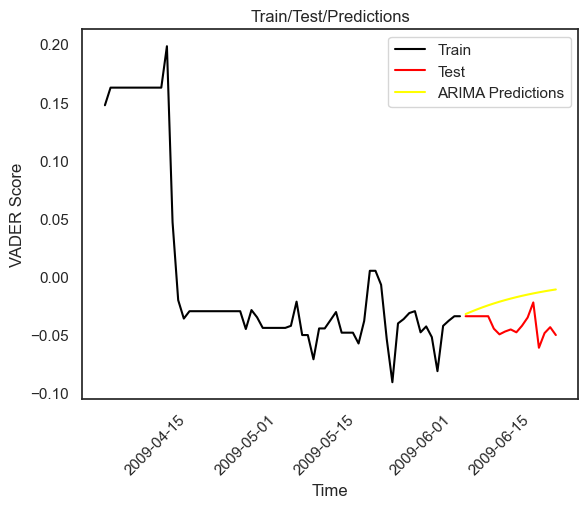

In [291]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [292]:
y = ts_df['vader_scores']
y

date
2009-04-06    0.147343
2009-04-07    0.162493
2009-04-08    0.162493
2009-04-09    0.162493
2009-04-10    0.162493
                ...   
2009-06-21   -0.022298
2009-06-22   -0.061300
2009-06-23   -0.048686
2009-06-24   -0.043578
2009-06-25   -0.050353
Freq: D, Name: vader_scores, Length: 81, dtype: float64

In [293]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [294]:
arima_vad_week_pred = ARIMA_train.get_forecast(7)
arima_vad_week_pred_df = arima_vad_week_pred.conf_int(alpha = 0.05) 
arima_vad_week_pred_df["Predictions"] = ARIMA_train.predict(start = arima_vad_week_pred_df.index[0], end = arima_vad_week_pred_df.index[-1]) 
#y_pred_df.index = y_test.index

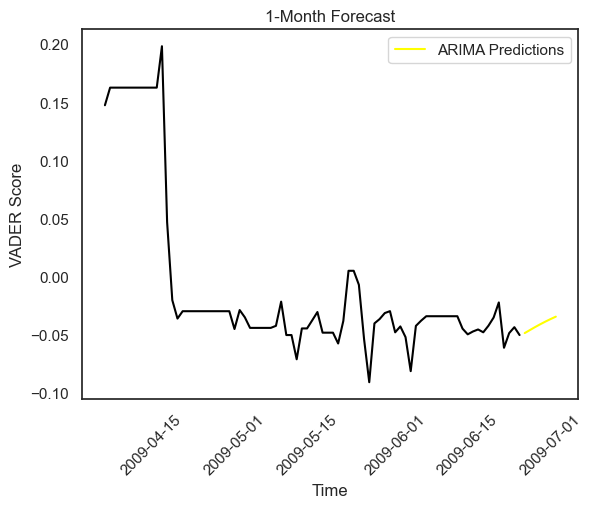

In [295]:
plt.plot(y, color = "black") 
plt.plot(arima_vad_week_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 1-Month Forecast

In [296]:
y = ts_df['vader_scores']
y

date
2009-04-06    0.147343
2009-04-07    0.162493
2009-04-08    0.162493
2009-04-09    0.162493
2009-04-10    0.162493
                ...   
2009-06-21   -0.022298
2009-06-22   -0.061300
2009-06-23   -0.048686
2009-06-24   -0.043578
2009-06-25   -0.050353
Freq: D, Name: vader_scores, Length: 81, dtype: float64

In [297]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [298]:
y_pred = ARIMA_train.get_forecast(30)
arima_month_vad_df = y_pred.conf_int(alpha = 0.05) 
arima_month_vad_df["Predictions"] = ARIMA_train.predict(start = arima_month_vad_df.index[0], end = arima_month_vad_df.index[-1]) 
#y_pred_df.index = y_test.index

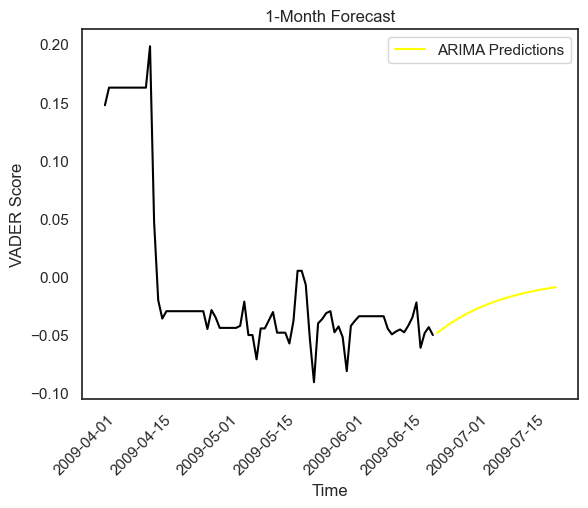

In [299]:
plt.plot(y, color = "black") 
plt.plot(arima_month_vad_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [300]:
y = ts_df['vader_scores']
y

date
2009-04-06    0.147343
2009-04-07    0.162493
2009-04-08    0.162493
2009-04-09    0.162493
2009-04-10    0.162493
                ...   
2009-06-21   -0.022298
2009-06-22   -0.061300
2009-06-23   -0.048686
2009-06-24   -0.043578
2009-06-25   -0.050353
Freq: D, Name: vader_scores, Length: 81, dtype: float64

In [301]:
ARIMA_train = SARIMAX(y, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [302]:
y_pred = ARIMA_train.get_forecast(90)
arima_3month_vad_df = y_pred.conf_int(alpha = 0.05) 
arima_3month_vad_df["Predictions"] = ARIMA_train.predict(start = arima_3month_vad_df.index[0], end = arima_3month_vad_df.index[-1]) 
#y_pred_df.index = y_test.index

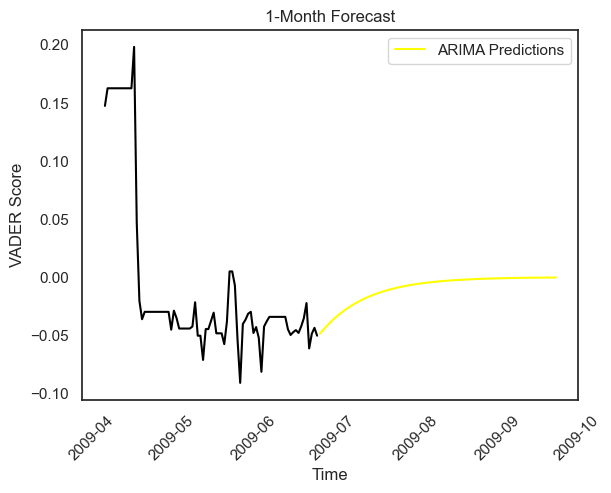

In [303]:
plt.plot(y, color = "black") 
plt.plot(arima_3month_vad_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('VADER Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

### Subjectivity

In [304]:
y_train = data_train['subjectivity_scores']
y_test = data_test['subjectivity_scores']

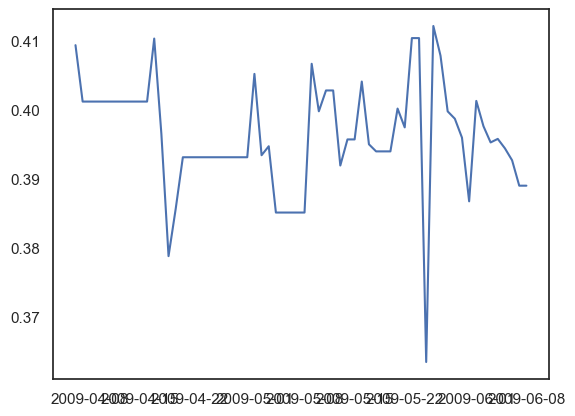

In [305]:
plt.plot(y_train)
plt.show()

In [306]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -0.5270122252021637
p-value 0.4849889665804382
Number of lags used 5
Number of observations 58
Critical values {'1%': -2.6053664565992865, '5%': -1.9464713057115914, '10%': -1.6129174701709788}
Maximised information criterion -330.44009535079715


In [307]:
y_train = data_train['subjectivity_scores'].diff()
y_test = data_test['subjectivity_scores'].diff()
y_train = y_train[1:]
y_test = y_test[1:]

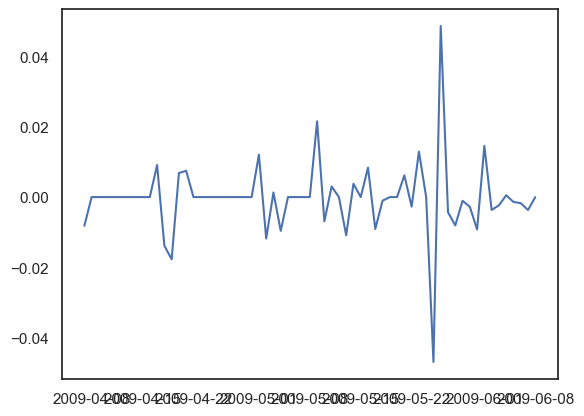

In [308]:
plt.plot(y_train)
plt.show()

In [309]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -5.903505020755745
p-value 1.5086634180995298e-08
Number of lags used 4
Number of observations 58
Critical values {'1%': -2.6053664565992865, '5%': -1.9464713057115914, '10%': -1.6129174701709788}
Maximised information criterion -325.0332953114288


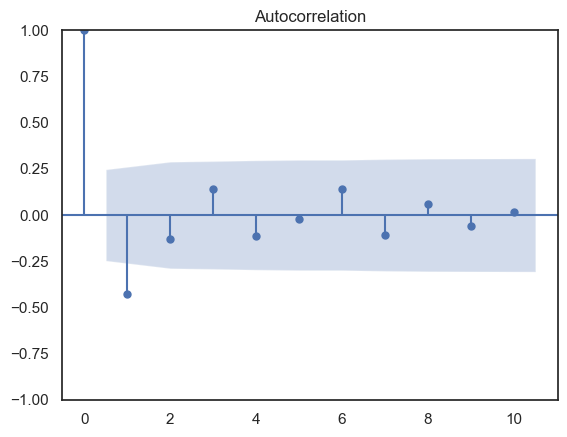

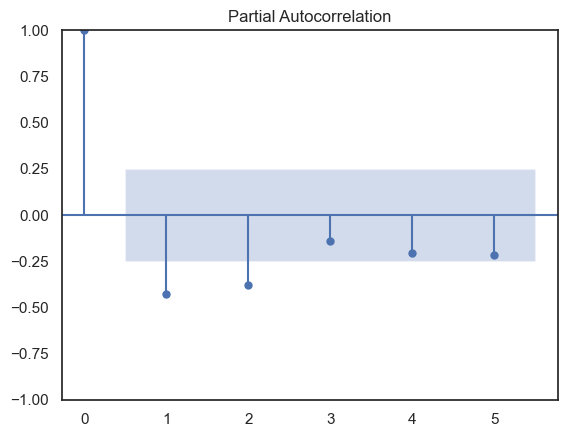

In [310]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [311]:
ARIMA_train = SARIMAX(y_train, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

C:\Users\benmc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [312]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [313]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [314]:
y_pred_df

,lower subjectivity_scores,upper subjectivity_scores,Predictions
date,,,
2009-06-10,-0.010455,0.021492,5.518498e-03
2009-06-11,-0.020183,0.021038,4.278455e-04
2009-06-12,-0.020668,0.020792,6.227399e-05
2009-06-13,-0.020047,0.021574,7.632193e-04
2009-06-14,-0.020675,0.021049,1.868841e-04
2009-06-15,-0.020831,0.020908,3.863074e-05
2009-06-16,-0.020760,0.020980,1.103849e-04
2009-06-17,-0.020827,0.020915,4.404451e-05
2009-06-18,-0.020859,0.020884,1.249853e-05


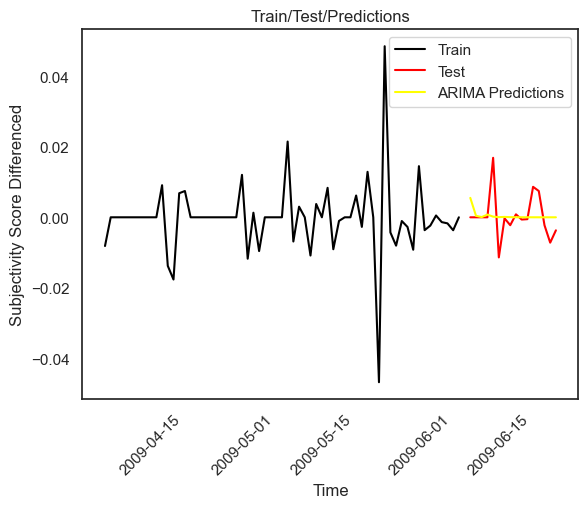

In [315]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Subjectivity Score Differenced')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [316]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [317]:
ARIMA_train = SARIMAX(y, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

In [318]:
y_pred = ARIMA_train.get_forecast(7)
arima_week_sub_df = y_pred.conf_int(alpha = 0.05) 
arima_week_sub_df["Predictions"] = ARIMA_train.predict(start = arima_week_sub_df.index[0], end = arima_week_sub_df.index[-1]) 
#y_pred_df.index = y_test.index

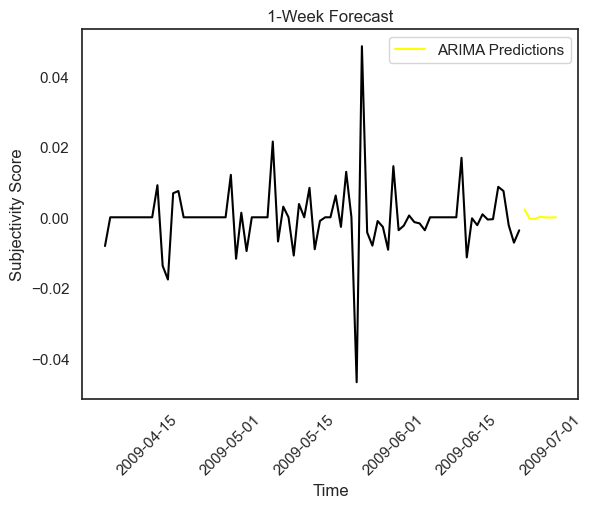

In [319]:
plt.plot(y, color = "black") 
plt.plot(arima_week_sub_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Subjectivity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Week Forecast") 
plt.show()

#### 1-Month Forecast

In [320]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [321]:
ARIMA_train = SARIMAX(y, order = (3, 0, 1)) 
ARIMA_train = ARIMA_train.fit()

In [322]:
y_pred = ARIMA_train.get_forecast(30)
arima_month_sub_df = y_pred.conf_int(alpha = 0.05) 
arima_month_sub_df["Predictions"] = ARIMA_train.predict(start = arima_month_sub_df.index[0], end = arima_month_sub_df.index[-1]) 
#y_pred_df.index = y_test.index

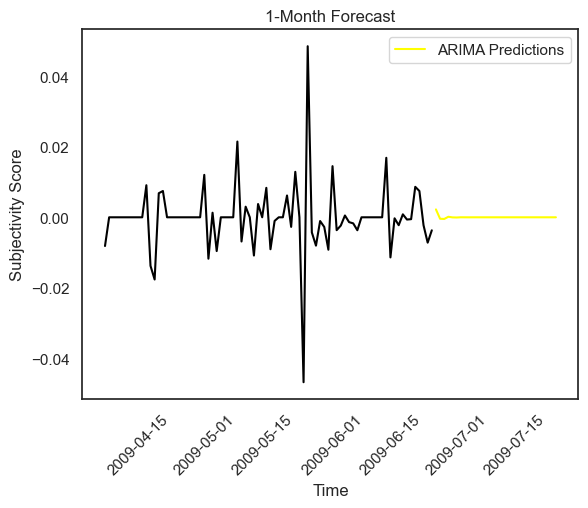

In [323]:
plt.plot(y, color = "black") 
plt.plot(arima_month_sub_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Subjectivity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [324]:
y = ts_df['subjectivity_scores']
y = y.diff()
y = y[1:]

In [325]:
ARIMA_train = SARIMAX(y, order = (3,0,1))
ARIMA_train = ARIMA_train.fit()

In [326]:
y_pred = ARIMA_train.get_forecast(90)
arima_3month_sub_df = y_pred.conf_int(alpha = 0.05) 
arima_3month_sub_df["Predictions"] = ARIMA_train.predict(start = arima_3month_sub_df.index[0], end = arima_3month_sub_df.index[-1]) 
#y_pred_df.index = y_test.index

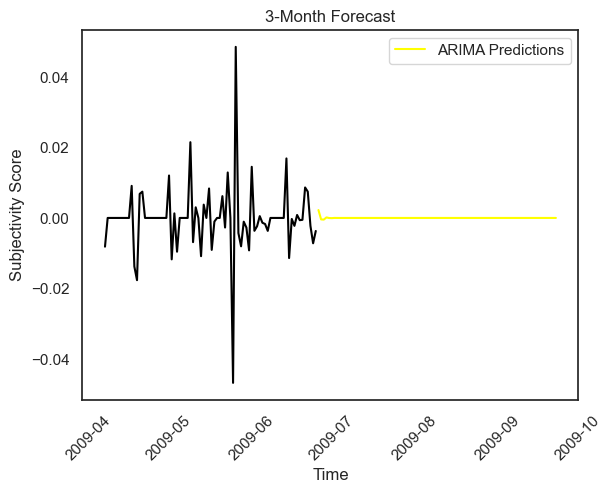

In [327]:
plt.plot(y, color = "black") 
plt.plot(arima_3month_sub_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Subjectivity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("3-Month Forecast") 
plt.show()

### Polarity

In [328]:
y_train = data_train['polarity_scores']
y_test = data_test['polarity_scores']

In [329]:
y_train = y_train[1:]
y_test = y_test[1:]

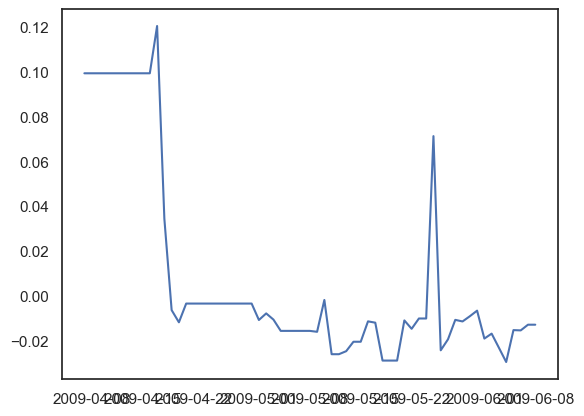

In [330]:
plt.plot(y_train)
plt.show()

In [331]:
Titles = ["Dickey-Fuller Test Statistic", 
          "p-value", 
          "Number of lags used", 
          "Number of observations", 
          "Critical values", 
          "Maximised information criterion"]

# Performing a Dickey-Fuller Test for stationarity on the series

Test_of_Stationarity = sm.tsa.stattools.adfuller(y_train, regression = "n")

# Viewing the results of the Dickey-Fuller Test

for i in range(len(Titles)):
    print(Titles[i], Test_of_Stationarity[i])

Dickey-Fuller Test Statistic -2.5408490661724126
p-value 0.010699445093285229
Number of lags used 0
Number of observations 62
Critical values {'1%': -2.602744838709677, '5%': -1.9460766397569735, '10%': -1.6131357396529151}
Maximised information criterion -272.4431978550246


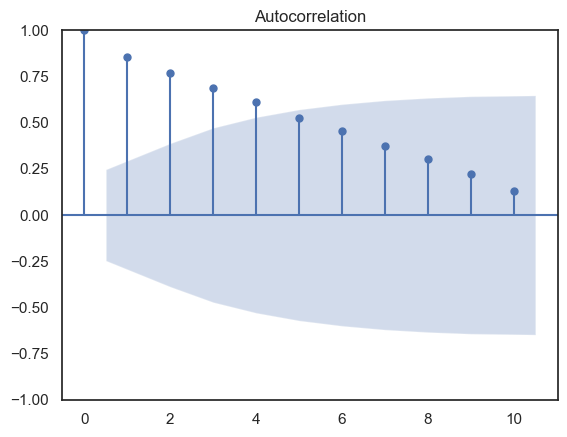

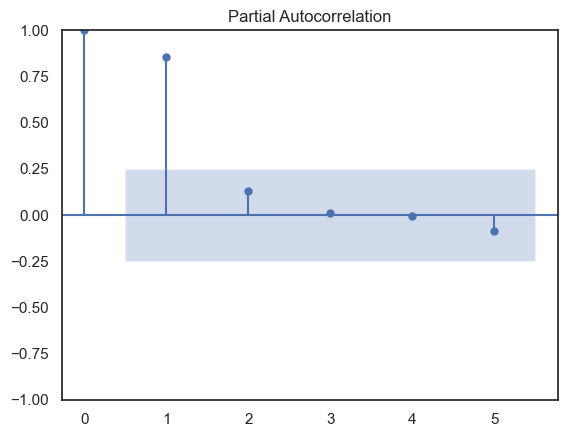

In [332]:
plot_acf(y_train, lags = 10)
plt.show()

plot_pacf(y_train, lags = 5)
plt.show()

In [333]:
ARIMA_train = SARIMAX(y_train, order = (2, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [334]:
y_pred = ARIMA_train.get_forecast(len(y_test)) 

In [335]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMA_train.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1]) 
y_pred_df.index = y_test.index

In [336]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
date,,,
2009-06-10,-0.051344,0.027609,-0.011868
2009-06-11,-0.060068,0.037520,-0.011274
2009-06-12,-0.067478,0.046135,-0.010672
2009-06-13,-0.073062,0.052842,-0.010110
2009-06-14,-0.077606,0.058454,-0.009576
2009-06-15,-0.081347,0.063206,-0.009071
2009-06-16,-0.084477,0.067294,-0.008592
2009-06-17,-0.087121,0.070845,-0.008138
2009-06-18,-0.089371,0.073954,-0.007709


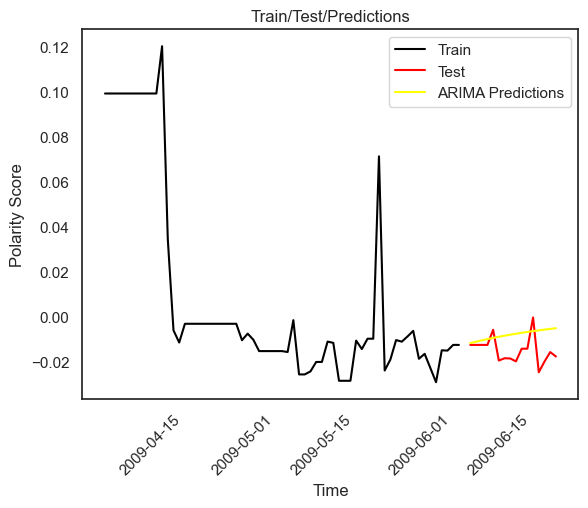

In [337]:
plt.plot(y_train, color = "black", label="Train") 
plt.plot(y_test, color = "red", label="Test")
plt.plot(y_pred_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("Train/Test/Predictions") 
plt.show()

### Forecast

#### 1-Week Forecast

In [338]:
y = ts_df['polarity_scores']
y

date
2009-04-06    0.094961
2009-04-07    0.099100
2009-04-08    0.099100
2009-04-09    0.099100
2009-04-10    0.099100
                ...   
2009-06-21   -0.000478
2009-06-22   -0.024853
2009-06-23   -0.020091
2009-06-24   -0.015868
2009-06-25   -0.017837
Freq: D, Name: polarity_scores, Length: 81, dtype: float64

In [339]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [340]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
date,,,
2009-06-10,-0.051344,0.027609,-0.011868
2009-06-11,-0.060068,0.037520,-0.011274
2009-06-12,-0.067478,0.046135,-0.010672
2009-06-13,-0.073062,0.052842,-0.010110
2009-06-14,-0.077606,0.058454,-0.009576
2009-06-15,-0.081347,0.063206,-0.009071
2009-06-16,-0.084477,0.067294,-0.008592
2009-06-17,-0.087121,0.070845,-0.008138
2009-06-18,-0.089371,0.073954,-0.007709


In [341]:
y_pred = ARIMA_train.get_forecast(7)
arima_week_pol_df = y_pred.conf_int(alpha = 0.05) 
arima_week_pol_df["Predictions"] = ARIMA_train.predict(start = arima_week_pol_df.index[0], end = arima_week_pol_df.index[-1]) 
#y_pred_df.index = y_test.index

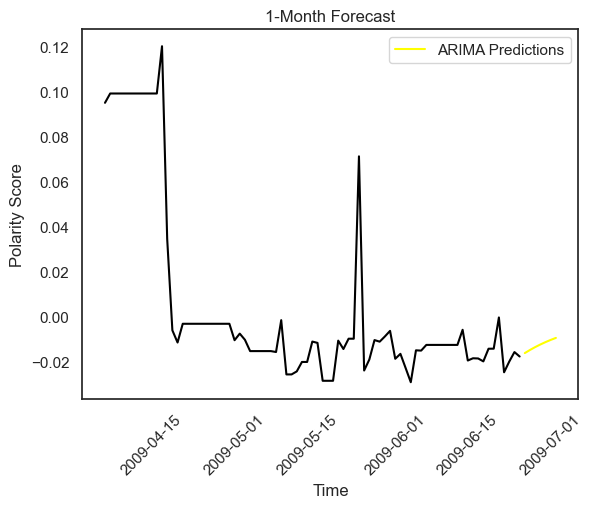

In [342]:
plt.plot(y, color = "black") 
plt.plot(arima_week_pol_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 1-Month Forecast

In [343]:
y = ts_df['polarity_scores']
y

date
2009-04-06    0.094961
2009-04-07    0.099100
2009-04-08    0.099100
2009-04-09    0.099100
2009-04-10    0.099100
                ...   
2009-06-21   -0.000478
2009-06-22   -0.024853
2009-06-23   -0.020091
2009-06-24   -0.015868
2009-06-25   -0.017837
Freq: D, Name: polarity_scores, Length: 81, dtype: float64

In [344]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [345]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
date,,,
2009-06-10,-0.051344,0.027609,-0.011868
2009-06-11,-0.060068,0.037520,-0.011274
2009-06-12,-0.067478,0.046135,-0.010672
2009-06-13,-0.073062,0.052842,-0.010110
2009-06-14,-0.077606,0.058454,-0.009576
2009-06-15,-0.081347,0.063206,-0.009071
2009-06-16,-0.084477,0.067294,-0.008592
2009-06-17,-0.087121,0.070845,-0.008138
2009-06-18,-0.089371,0.073954,-0.007709


In [346]:
y_pred = ARIMA_train.get_forecast(30)
arima_month_pol_df = y_pred.conf_int(alpha = 0.05) 
arima_month_pol_df["Predictions"] = ARIMA_train.predict(start = arima_month_pol_df.index[0], end = arima_month_pol_df.index[-1]) 
#y_pred_df.index = y_test.index

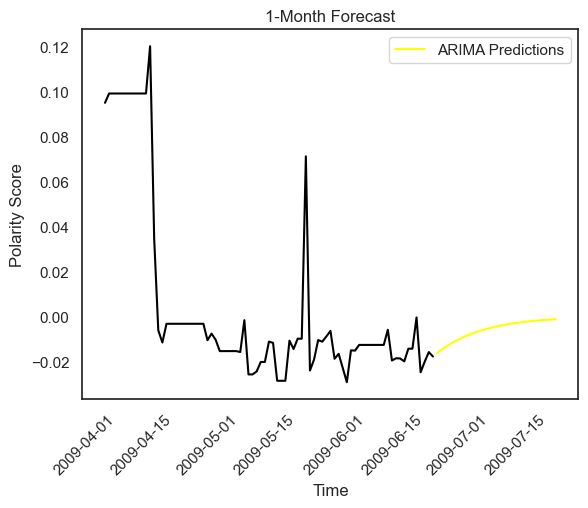

In [347]:
plt.plot(y, color = "black") 
plt.plot(arima_month_pol_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("1-Month Forecast") 
plt.show()

#### 3-Month Forecast

In [348]:
y = ts_df['polarity_scores']
y

date
2009-04-06    0.094961
2009-04-07    0.099100
2009-04-08    0.099100
2009-04-09    0.099100
2009-04-10    0.099100
                ...   
2009-06-21   -0.000478
2009-06-22   -0.024853
2009-06-23   -0.020091
2009-06-24   -0.015868
2009-06-25   -0.017837
Freq: D, Name: polarity_scores, Length: 81, dtype: float64

In [349]:
ARIMA_train = SARIMAX(y, order = (1, 0, 0)) 
ARIMA_train = ARIMA_train.fit()

In [350]:
y_pred_df

,lower polarity_scores,upper polarity_scores,Predictions
date,,,
2009-06-10,-0.051344,0.027609,-0.011868
2009-06-11,-0.060068,0.037520,-0.011274
2009-06-12,-0.067478,0.046135,-0.010672
2009-06-13,-0.073062,0.052842,-0.010110
2009-06-14,-0.077606,0.058454,-0.009576
2009-06-15,-0.081347,0.063206,-0.009071
2009-06-16,-0.084477,0.067294,-0.008592
2009-06-17,-0.087121,0.070845,-0.008138
2009-06-18,-0.089371,0.073954,-0.007709


In [351]:
y_pred = ARIMA_train.get_forecast(90)
arima_3month_pol_df = y_pred.conf_int(alpha = 0.05) 
arima_3month_pol_df["Predictions"] = ARIMA_train.predict(start = arima_3month_pol_df.index[0], end = arima_3month_pol_df.index[-1]) 
#y_pred_df.index = y_test.index

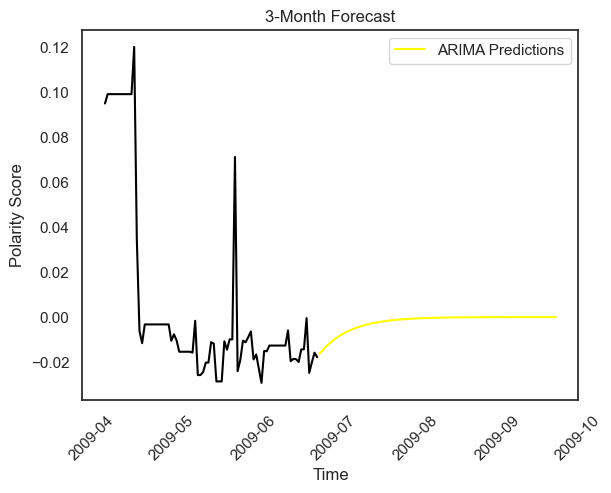

In [352]:
plt.plot(y, color = "black") 
plt.plot(arima_3month_pol_df['Predictions'], color='Yellow', label = 'ARIMA Predictions') 
plt.legend()
plt.ylabel('Polarity Score')
plt.xlabel('Time') 
plt.xticks(rotation=45) 
plt.title("3-Month Forecast") 
plt.show()

## Interactive Dashboard

In [ ]:
pip install dash

In [3]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [4]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from ipywidgets import interact

In [416]:
pol_df = pd.DataFrame({
    'Date': ts_df.index,
    'Value': ts_df['polarity_scores']
    })
sub_df = pd.DataFrame({
    'Date': ts_df.index,
    'Value': ts_df['subjectivity_scores']
    })
vad_df = pd.DataFrame({
    'Date': ts_df.index,
    'Value': ts_df['vader_scores']
    })

In [417]:
df1 = pd.DataFrame({
    'Date': week_rf_predictions_pol.index,
    'Value': week_rf_predictions_pol.values
    })
data = pd.concat([pol_df,df1],ignore_index = True)
pol_week_rf_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': month_rf_predictions_pol.index,
    'Value': month_rf_predictions_pol.values
    })
data = pd.concat([pol_df,df1],ignore_index = True)
pol_month_rf_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': three_m_rf_predictions_pol.index,
    'Value': three_m_rf_predictions_pol.values
    })
data = pd.concat([pol_df,df1],ignore_index = True)
three_m_rf_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_week_pol_df.index,
    'Value': arima_week_pol_df['Predictions']
    })
data = pd.concat([pol_df,df1],ignore_index = True)
arima_week_pol_df_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_month_pol_df.index,
    'Value': arima_month_pol_df['Predictions']
    })
data = pd.concat([pol_df,df1],ignore_index = True)
arima_month_pol_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_3month_pol_df.index,
    'Value': arima_3month_pol_df['Predictions']
    })
data = pd.concat([pol_df,df1],ignore_index = True)
arima_3month_pol_data = pd.DataFrame(data)
    


    
df1 = pd.DataFrame({
    'Date': week_rf_predictions_sub.index,
    'Value': week_rf_predictions_sub.values
    })
data = pd.concat([sub_df,df1],ignore_index = True)
weel_rf_prediction_sub_data = pd.DataFrame(data)    

        
df1 = pd.DataFrame({
    'Date': month_rf_predictions_sub.index,
    'Value': month_rf_predictions_sub.values
    })
data = pd.concat([sub_df,df1],ignore_index = True)
month_rf_prediction_sub_data = pd.DataFrame(data)   


df1 = pd.DataFrame({
    'Date': threem_predictions_sub.index,
    'Value': threem_predictions_sub.values
    })
data = pd.concat([sub_df,df1],ignore_index = True)
threem_rf_prediction_sub_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_week_sub_df.index,
    'Value': arima_week_sub_df['Predictions']
    })
data = pd.concat([sub_df,df1],ignore_index = True)
arima_week_sub_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_month_sub_df.index,
    'Value': arima_month_sub_df['Predictions']
    })
data = pd.concat([sub_df,df1],ignore_index = True)
arima_month_sub_data = pd.DataFrame(data)        


df1 = pd.DataFrame({
    'Date': arima_3month_sub_df.index,
    'Value': arima_3month_sub_df['Predictions']
    })
data = pd.concat([sub_df,df1],ignore_index = True)
arima_3month_sub_data = pd.DataFrame(data)

    
df1 = pd.DataFrame({
    'Date': arima_vad_week_pred_df.index,
    'Value': arima_vad_week_pred_df['Predictions']
    })
data = pd.concat([vad_df,df1],ignore_index = True)
arima_week_vad_data = pd.DataFrame(data)    


df1 = pd.DataFrame({
    'Date': month_predictions_vad.index,
    'Value': month_predictions_vad.values
    })
data = pd.concat([vad_df,df1],ignore_index = True)
month_predictions_vad_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': threem_predictions_vad.index,
    'Value': threem_predictions_vad.values
    })
data = pd.concat([vad_df,df1],ignore_index = True)
threem_predictions_vad_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': week_rf_predictions_vad.index,
    'Value': week_rf_predictions_vad.values
    })
data = pd.concat([vad_df,df1],ignore_index = True)
week_rf_predictions_vad_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_month_vad_df.index,
    'Value': arima_month_vad_df['Predictions']
    })
data = pd.concat([vad_df,df1],ignore_index = True)
arima_month_vad_data = pd.DataFrame(data)


df1 = pd.DataFrame({
    'Date': arima_3month_vad_df.index,
    'Value': arima_3month_vad_df['Predictions']
    })
data = pd.concat([vad_df,df1],ignore_index = True)
arima_3month_vad_data = pd.DataFrame(data)

In [421]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Sentiment Forecasting"),
    
    dcc.Dropdown(
        id='sentiment_drop',
        options=[
            {'label': 'Polarity', 'value': 'pol'},
            {'label': 'Subjectivity', 'value': 'sub'},
            {'label': 'Vader', 'value': 'vad'}
        ],
        value='pol',
        style={'width': '50%'}
    ),
    
    dcc.Dropdown(
        id='model_drop',
        options=[
            {'label': 'Random Forest', 'value': 'rf'},
            {'label': 'ARIMA', 'value': 'arima'}
        ],
        value='rf',
        style={'width': '50%'}
    ),
    
    dcc.Dropdown(
        id='time_drop',
        options=[
            {'label': '1-Week', 'value': 'week'},
            {'label': '1-Month', 'value': 'month'},
            {'label': '3-Month', 'value': '3month'}
        ],
        value='week',
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='time-series-plot')
])

# Define callback to update the plot based on the selected time series
@app.callback(
    Output('time-series-plot', 'figure'),
    [Input('sentiment_drop', 'value'),
    Input('model_drop', 'value'),
    Input('time_drop', 'value')]
)
def update_plot(sent, model, time):
    if sent+time+model == 'polweekrf':
        data = pol_week_rf_data
        
    elif sent+time+model == 'polmonthrf':
        data = pol_month_rf_data
        #ata = pd.concat([ts_df['polarity_scores'], month_rf_predictions_pol])
        
    elif sent+time+model == 'pol3monthrf':
        data = three_m_rf_data
        #ata = pd.concat([ts_df['polarity_scores'], three_m_rf_predictions_pol])
        
    elif sent+time+model == 'polweekarima':
        data = arima_week_pol_df_data
        #ata = pd.concat([ts_df['polarity_scores'], arima_week_pol_dfl])
        
    elif sent+time+model == 'polmontharima':
        data = arima_month_pol_data
        #ata = pd.concat([ts_df['polarity_scores'], arima_month_pol_df])
        
    elif sent+time+model == 'pol3montharima':
        data = arima_3month_pol_data
        
        #ata = pd.concat([ts_df['polarity_scores'], arima_3month_pol_df])    
        
    elif sent+time+model == 'subweekrf':
        data = weel_rf_prediction_sub_data
        #ata = pd.concat([ts_df['subjectivity_scores'], week_rf_predictions_pol])
        
    elif sent+time+model == 'submonthrf':
        data = month_rf_prediction_sub_data
        #ata = pd.concat([ts_df['subjectivity_scores'], month_rf_predictions_pol])
        
    elif sent+time+model == 'sub3monthrf':
        data = threem_rf_prediction_sub_data
        
    elif sent+time+model == 'subweekarima':
        data = arima_week_sub_data
        
        #ata = pd.concat([ts_df['subjectivity_scores'], arima_week_sub_df])
        
    elif sent+time+model == 'submontharima':
        data = arima_month_sub_data
        
    elif sent+time+model == 'sub3montharima':
        data = arima_3month_sub_data
       
    elif sent+time+model == 'vadweekarima':
        data = arima_week_vad_data
        
    elif sent+time+model == 'vadmonthrf':
        data = month_predictions_vad_data
        
        #rima_month_vad_df
        #ata = pd.concat([ts_df['vader_scores'], month_predictions_vad])
        
    elif sent+time+model == 'vad3monthrf':
        data = threem_predictions_vad_data
        
    elif sent+time+model == 'vadweekrf':
        data = week_rf_predictions_vad_data
        
    elif sent+time+model == 'vadmontharima':
        data = arima_month_vad_data
        
    elif sent+time+model == 'vad3montharima':
        data = arima_3month_vad_data
        
    else:
        return {}

    fig = px.line(data, x= 'Date', y = 'Value', title = 'Time Series Forecasting')
    return fig

# Run the app
app.run_server(mode='inline', port=8050)
